<a href="https://colab.research.google.com/github/moloned/Tetra/blob/master/ESA_TestFramework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ESA Star-Tracker Test Scene Generator
-------------------------------------

################################################################################################

The original notebook and simulator source had to be modified to work in Python3 
https://kelvins.esa.int/star-trackers-first-contact/home/

1. np.seterr was required to avoid runtime numerical errors

2. in scene creation set min_stars=20 # this parameter was missing in the original example code

3. needed to copy hip_main.dat and input.csv to scripts data to get notebook to work

################################################################################################

################################################################################################

The parameters used to generate scenes (simulating the star tracker camera) are:

- resolution: 1920x1440 pixels
- normalized principal point px, py: 0.5
- fovx=10 degrees
- sxsy=1
- no distortion (rectilinear/perspective camera model)
- centroiding noise typically below 1 pixel
- measurement error on the magnitude measurement (error is increasing at higher magnitudes)
- up to 80 artifacts

See the extra info in the challenge page for a first explanation of these parameters. 
You can also play around with the example scripts to see the effect of these parameters 
on the scene created.

Note that some scenes are impossible to be correctly identified.

################################################################################################

In [0]:
#!pip install

from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)



Mounted at /content/gdrive


In [0]:
!cd '/content/gdrive/My Drive/StarTracker/Test_Trackers';ls
import os
os.chdir('/content/gdrive/My Drive/StarTracker/Test_Trackers')

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
chdir: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
BSC5			       LICENSE		    scores.bmp
compressed_course_sky_map.npy  params.txt	    simulator_DM.py
C_Tetra			       pattern_catalog.npy  star_table.npy
ESA_TestFramework.ipynb        pics		    tetra.py
fine_sky_map.npy	       __pycache__	    verify.ipynb
hip_main.dat		       README.md


In [0]:
from simulator_DM import *

In [0]:
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'
sns.set_style('white')

In [0]:
# this change was required to avoid runtime numerical errors causing the program to crash
#
np.seterr(divide='ignore', invalid='ignore') # https://docs.scipy.org/doc/numpy/reference/generated/numpy.seterr.html

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

Settings
--------

In [0]:
# resolution
res_x = 1920 # pixels
res_y = 1440 # pixels

# normalized focal length
f = 0.5 / np.tan(np.deg2rad(10) / 2)

# pixel aspect ratio
pixel_ar = 1

# normalized principal point
ppx = 0.5
ppy = 0.5

gaussian_noise_sigma = 20e-6 # rad

cam = 0

In [0]:
# magnitude parameters

A_pixel = 525 # photonelectrons/s mm
sigma_pixel = 525 # photonelectrons/s mm

sigma_psf = 0.5 # pixel
t_exp = 0.2 # s
aperture = 15 # mm

base_photons = 19100 # photoelectrons per mm² and second of a magnitude 0 G2 star

magnitude_gaussian = 0.01 # mag

In [0]:
# star count

min_true = 3
max_true = 100
min_false = 0
max_false = 10

Base Objects
--------

In [0]:
catalog = StarCatalog()

In [0]:
cameras = [
    RectilinearCamera,
    EquidistantCamera,
    EquisolidAngleCamera,
    StereographicCamera,
    OrthographicCamera,
]

camera = cameras[cam](f, (res_x, res_y), pixel_ar, (ppx, ppy))

In [0]:
detector = StarDetector(A_pixel, sigma_pixel, sigma_psf, t_exp, aperture, base_photons)

Scene Creation
------------

In [0]:
from datetime import datetime

#num_scenes = 1  # quick evaluation
num_scenes = 100
min_stars  = 20 # this parameter was missing in the original example code

In [0]:
import os, sys

path = "./pics"                                   # Make directory for generated scene .jpg's
if (os.path.exists(path)==False): os.mkdir(path); # check if directory exists first

generating 0 ./pics/ESAstartracker_test_3777980694.jpg
generating 1 ./pics/ESAstartracker_test_3777980695.jpg
generating 2 ./pics/ESAstartracker_test_3777980697.jpg
generating 3 ./pics/ESAstartracker_test_3777980700.jpg
generating 4 ./pics/ESAstartracker_test_3777980701.jpg
generating 5 ./pics/ESAstartracker_test_3777980701.jpg
generating 6 ./pics/ESAstartracker_test_3777980703.jpg
generating 7 ./pics/ESAstartracker_test_3777980705.jpg
generating 8 ./pics/ESAstartracker_test_3777980709.jpg
generating 9 ./pics/ESAstartracker_test_3777980710.jpg
generating 10 ./pics/ESAstartracker_test_3777980713.jpg
generating 11 ./pics/ESAstartracker_test_3777980714.jpg
generating 12 ./pics/ESAstartracker_test_3777980714.jpg
generating 13 ./pics/ESAstartracker_test_3777980720.jpg
generating 14 ./pics/ESAstartracker_test_3777980721.jpg
generating 15 ./pics/ESAstartracker_test_3777980722.jpg
generating 16 ./pics/ESAstartracker_test_3777980723.jpg
generating 17 ./pics/ESAstartracker_test_3777980726.jpg
ge

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


generating 20 ./pics/ESAstartracker_test_3777980732.jpg
generating 21 ./pics/ESAstartracker_test_3777980737.jpg
generating 22 ./pics/ESAstartracker_test_3777980742.jpg
generating 23 ./pics/ESAstartracker_test_3777980743.jpg
generating 24 ./pics/ESAstartracker_test_3777980747.jpg
generating 25 ./pics/ESAstartracker_test_3777980749.jpg
generating 26 ./pics/ESAstartracker_test_3777980751.jpg
generating 27 ./pics/ESAstartracker_test_3777980752.jpg
generating 28 ./pics/ESAstartracker_test_3777980754.jpg
generating 29 ./pics/ESAstartracker_test_3777980756.jpg
generating 30 ./pics/ESAstartracker_test_3777980757.jpg
generating 31 ./pics/ESAstartracker_test_3777980760.jpg
generating 32 ./pics/ESAstartracker_test_3777980761.jpg
generating 33 ./pics/ESAstartracker_test_3777980763.jpg
generating 34 ./pics/ESAstartracker_test_3777980763.jpg
generating 35 ./pics/ESAstartracker_test_3777980764.jpg
generating 36 ./pics/ESAstartracker_test_3777980766.jpg
generating 37 ./pics/ESAstartracker_test_3777980

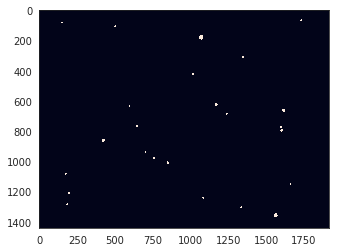

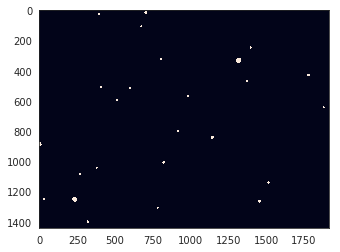

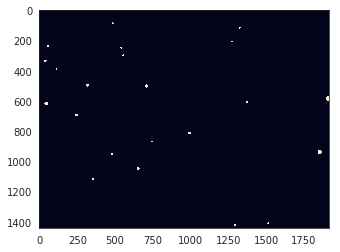

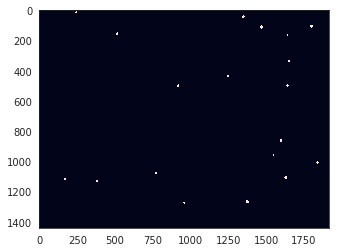

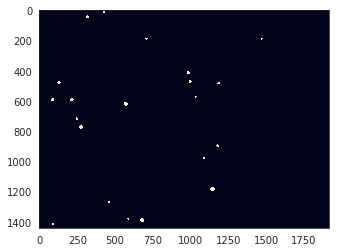

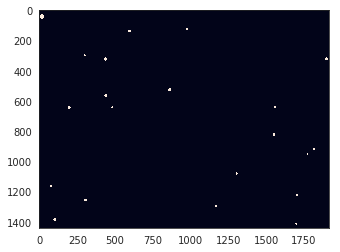

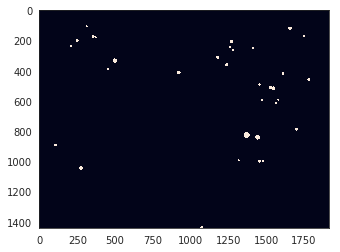

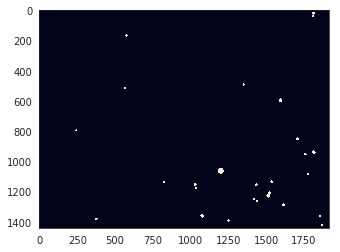

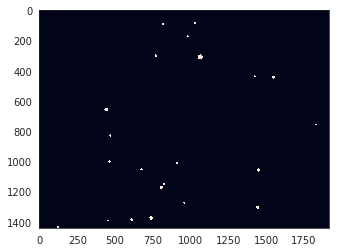

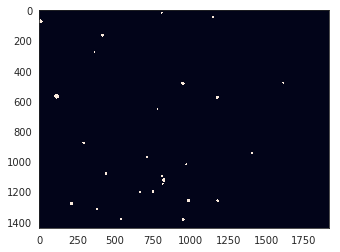

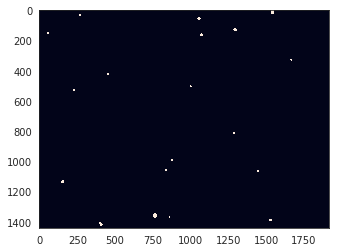

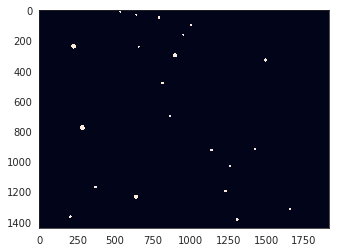

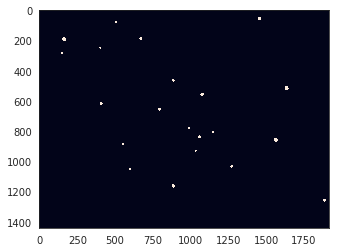

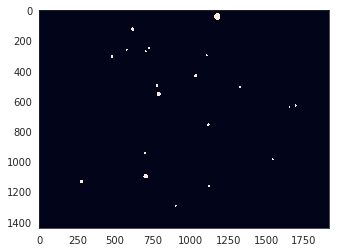

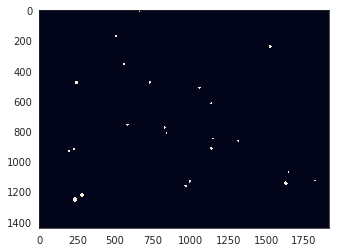

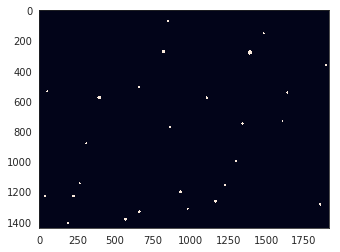

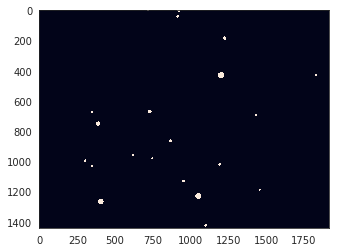

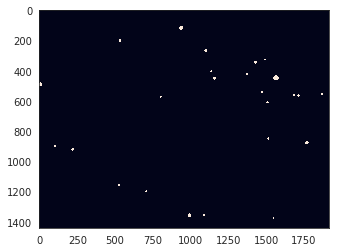

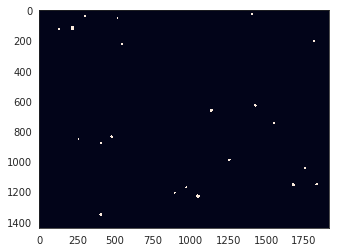

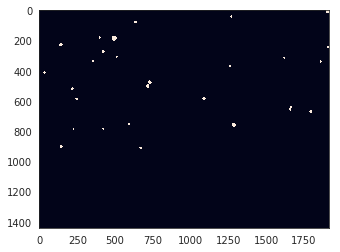

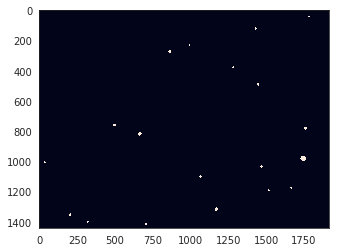

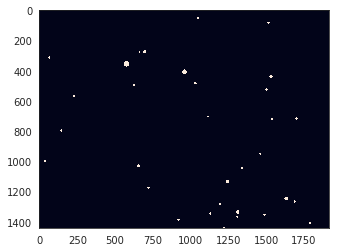

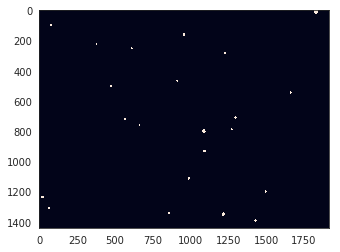

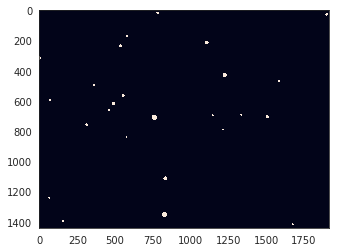

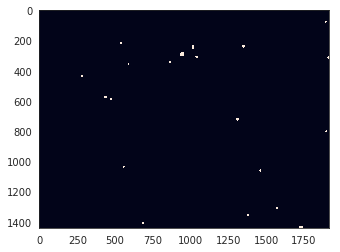

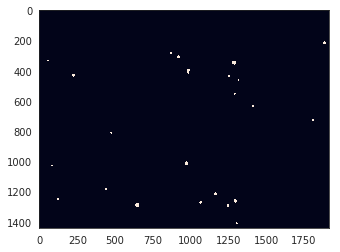

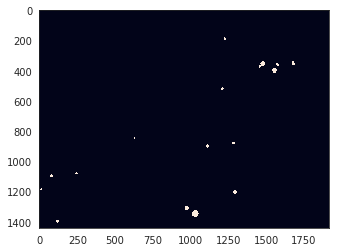

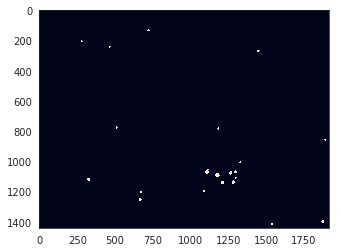

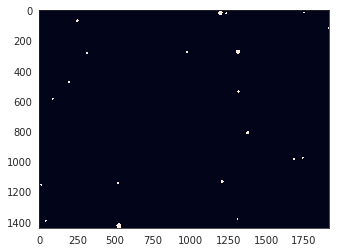

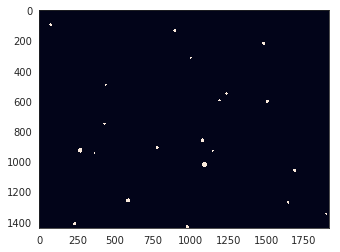

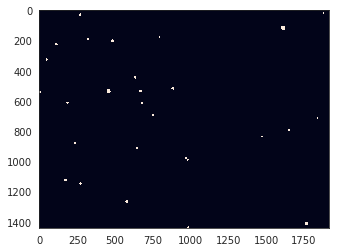

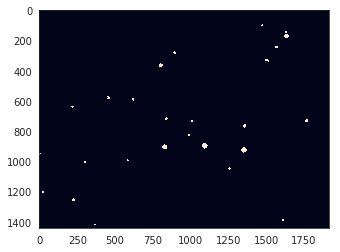

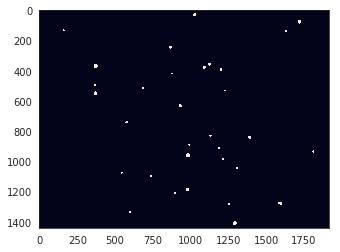

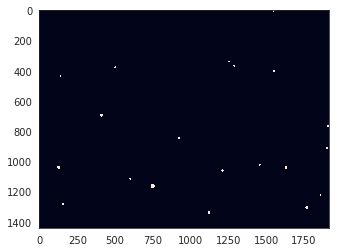

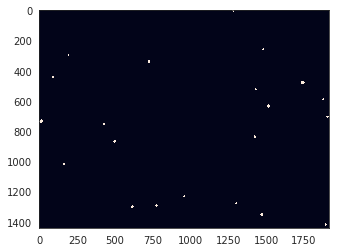

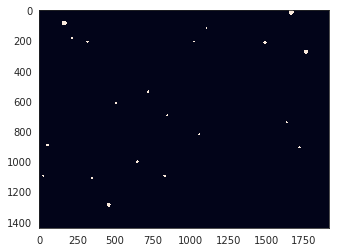

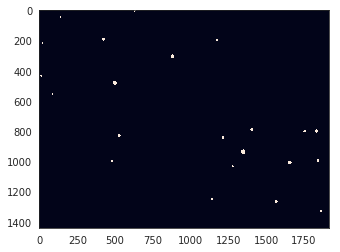

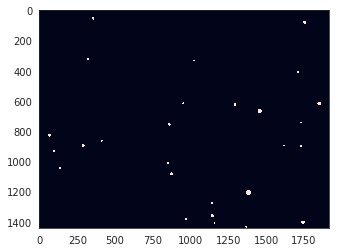

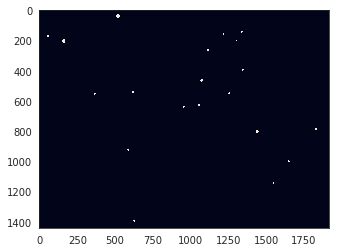

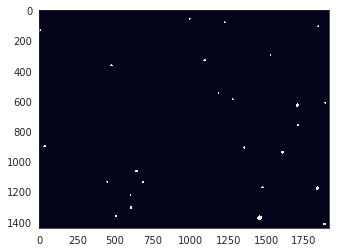

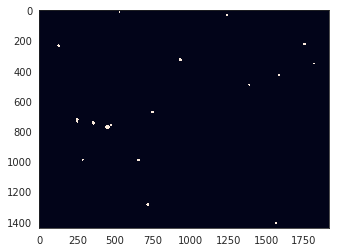

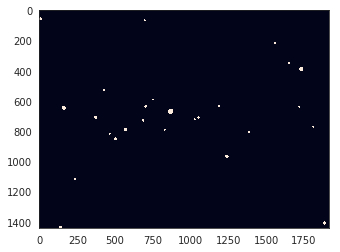

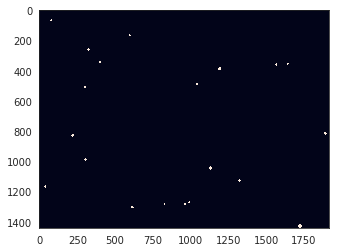

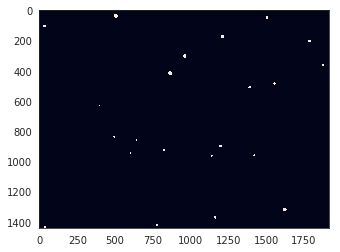

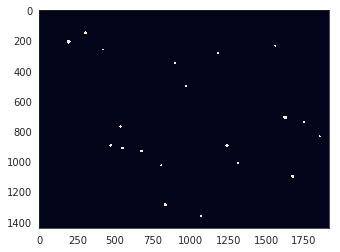

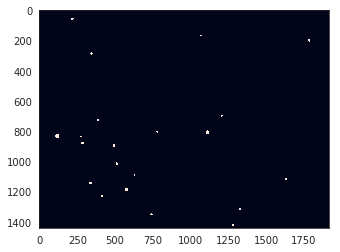

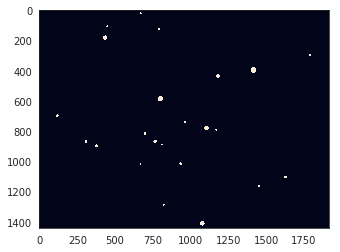

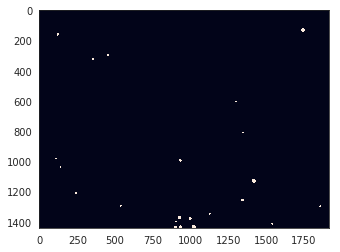

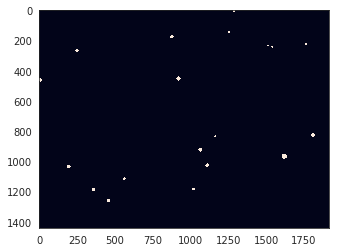

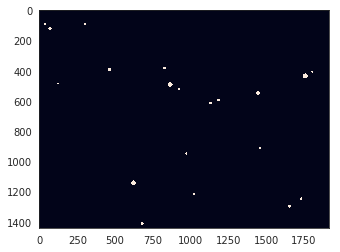

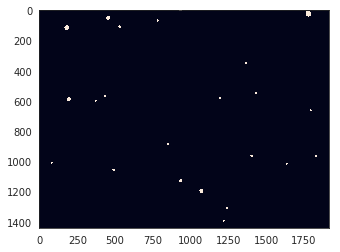

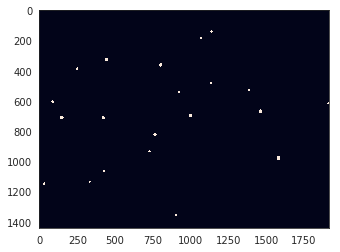

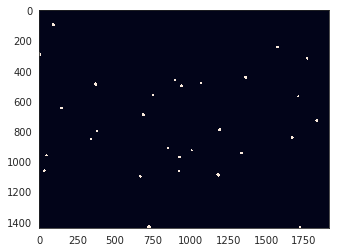

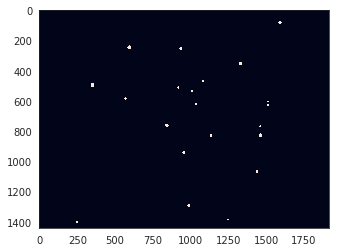

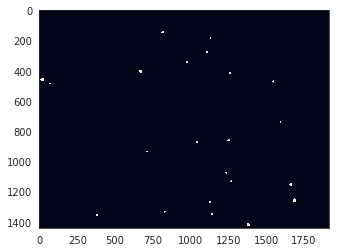

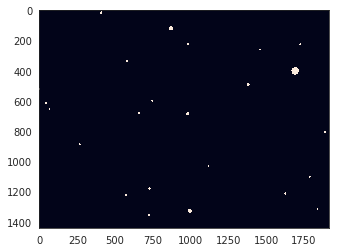

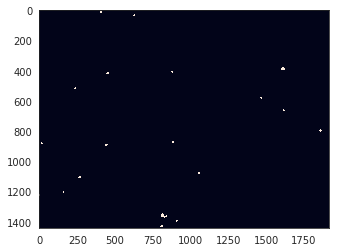

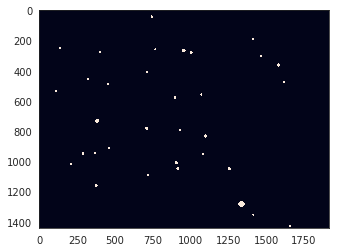

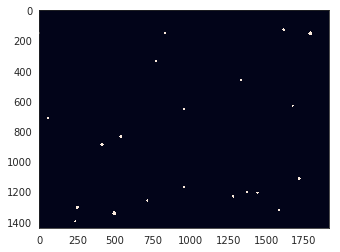

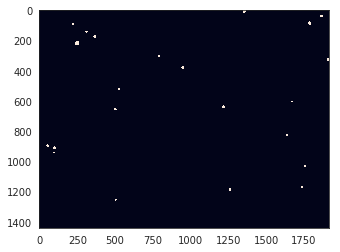

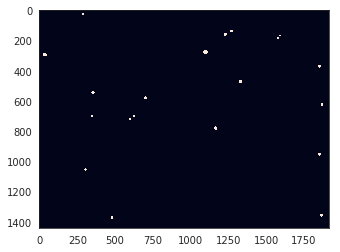

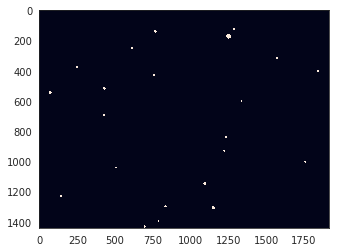

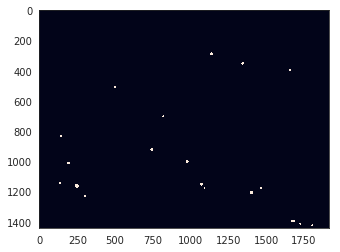

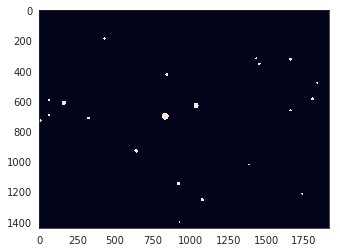

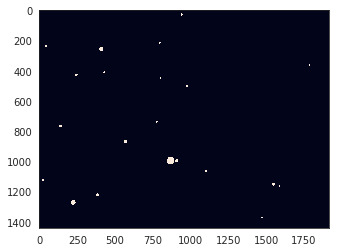

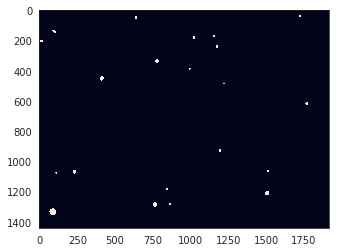

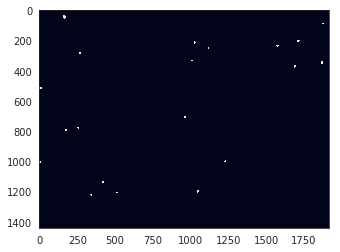

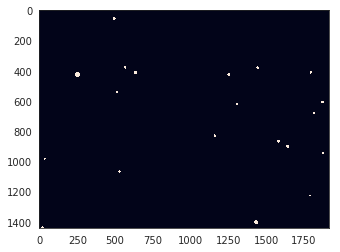

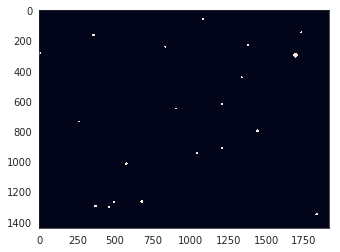

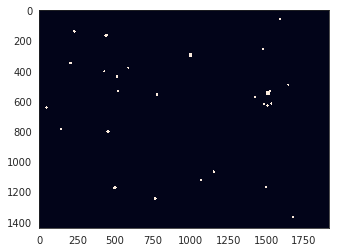

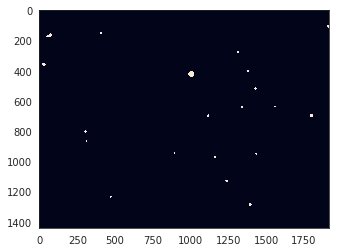

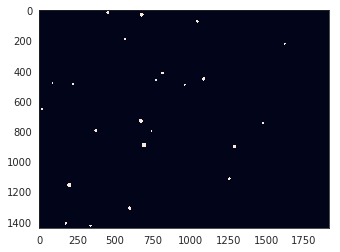

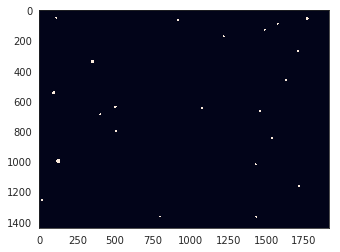

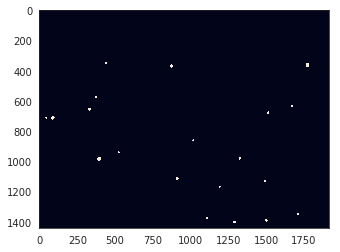

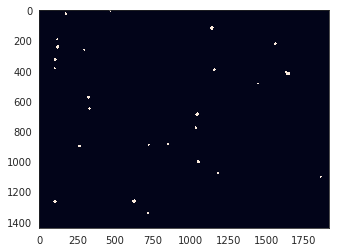

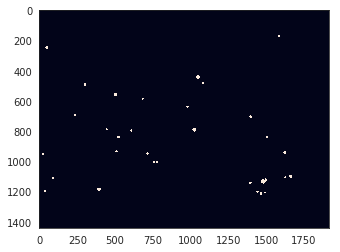

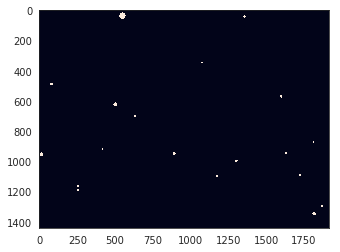

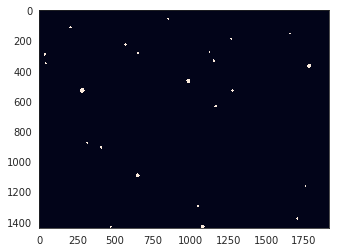

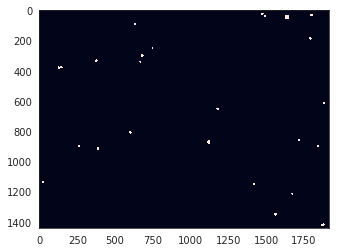

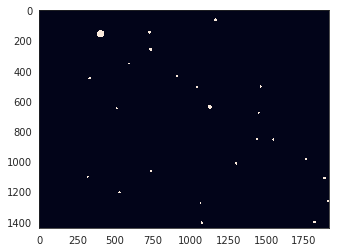

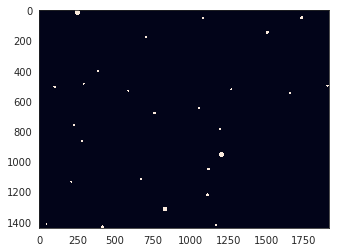

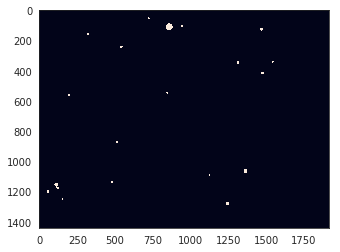

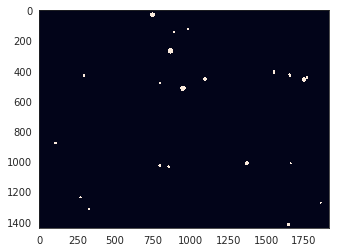

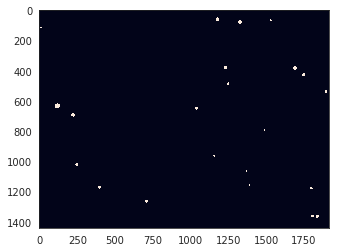

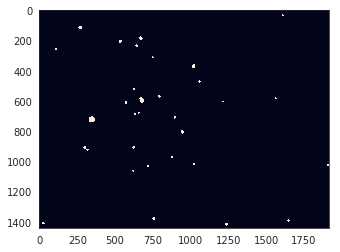

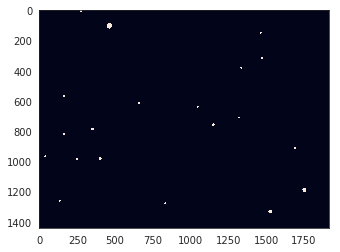

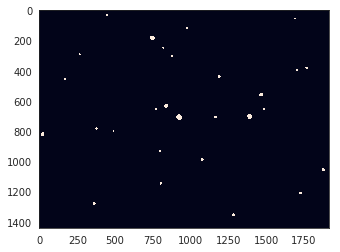

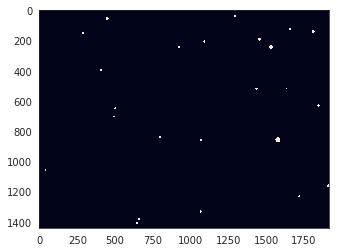

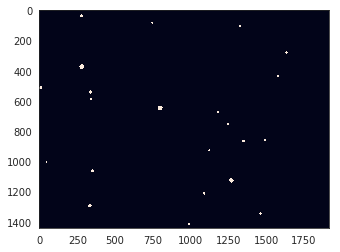

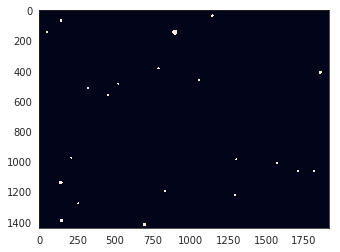

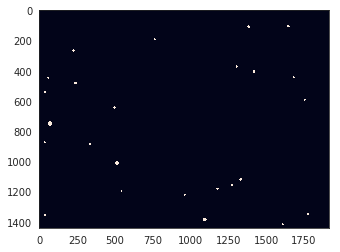

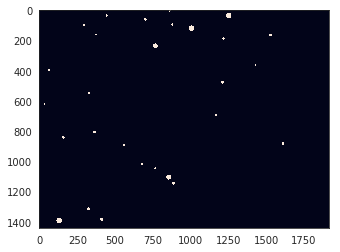

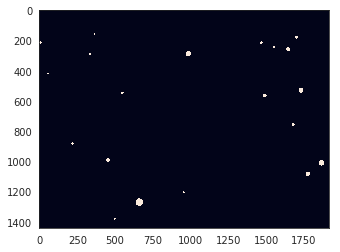

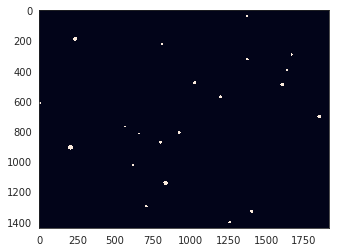

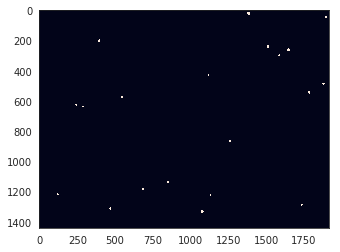

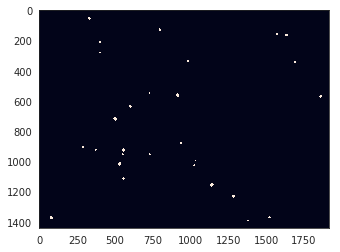

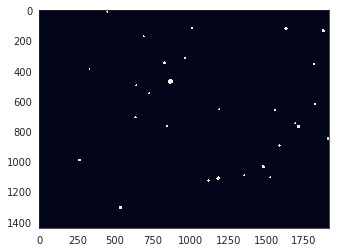

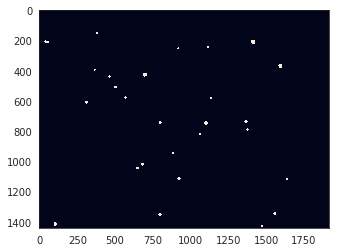

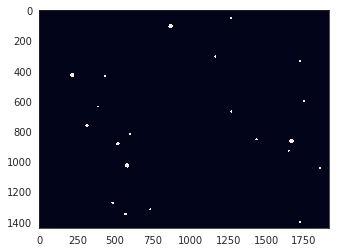

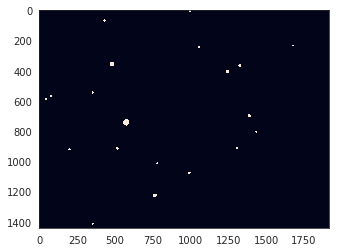

In [0]:
inputs = []
outputs = []

for i in range(num_scenes):
    scene = Scene.random(catalog, camera, detector, min_true, max_true, min_false, max_false, min_stars, gaussian_noise_sigma=gaussian_noise_sigma, magnitude_gaussian=magnitude_gaussian)   
    inputs.append(np.hstack((scene.pos[::, ::-1], scene.magnitudes.reshape(-1, 1))).flatten())
    outputs.append(scene.ids)
    #
    # output image of generated scene
    #
    #print("generated scene contains", np.count_nonzero(scene.ids), "stars")
    tim = (datetime.utcnow() - datetime(1900, 1, 1)).total_seconds()
    as_image=True
    fig = scene.render(as_image)
    fname = "./pics/ESAstartracker_test_%d.jpg" % tim
    print("generating",i,fname)
    fig.savefig(fname)

Write I/O Scene Data to .csv files
--------------------------

In [0]:
def write_csv(filename, lines):
    with open(filename, 'w') as f:
        for line in lines:
            f.write(','.join(str(value) for value in line) + '\n')

In [0]:
write_csv('input_sample.csv', inputs)
write_csv('result_sample.csv', outputs)

Star-Tracker Benchmarking
--------------------------

Tetra StarTracker: Star Identification Based on Hash Map
--------------------------

Tetra is a calibration-less LiS (Lost in Space) algorithm meaning that it can determine its attitude without any prior knowledge including field-of-view (fov), lens parameters or distortions.

For performance efficiency Tetra is based on a directly-addressed hash-table trading off memory occupancy for vastly incleased processing speed (authors claim two orders of magnitude). The algorithm is optimised to minimise the number of table accesses and computational load.

The authors compare their results with other algorithms under the following headings:

1. execution time
2. centroiding error sensitivity
3. field-of-view error sensitivity

They also compare Tetra's hash-lookup with modifications of Pyramid's cross-referencing step and Non-dimentional Star ID.

Paper:
https://digitalcommons.usu.edu/cgi/viewcontent.cgi?article=3655&context=smallsat

Code:
https://github.com/brownj4/Tetra


In [0]:
from tetra import * # import tetra.py star-tracker

###############################################################################################################
#
# main loop to process complete list of files in ./pics directory
#
###############################################################################################################
#
print("file #, filename, mismatch probability, RA, DEC, ROLL, FOV, secs") # print .csv header
i=0
for image_file_name in glob.glob(image_directory + '/*'):
  i = i +1
  #
  # run star-trackers on test scenes in parallel
  #
  tetra(i,image_file_name) # prints out one line per scene in .csv format

file #, filename, mismatch probability, RA, DEC, ROLL, FOV, secs
1 , ./pics/7qPnoi1.jpg ,2.718e-86 ,242.0269 ,32.3290 ,34.0370 ,56.1006 ,0.607330
2 , ./pics/Alpha_Centauri_Crux_2005c.jpg ,2.367e-112 ,193.6953 ,-57.7952 ,287.2026 ,23.3137 ,0.264077
3 , ./pics/CanisMajor_heic0516d.jpg ,2.495e-100 ,103.6356 ,-4.1290 ,353.8478 ,64.5514 ,1.405220
4 , ./pics/Aries_4min_08132004.jpg ,4.601e-112 ,21.4299 ,31.0221 ,354.6076 ,58.1320 ,0.244743
5 , ./pics/Andromeda_gallery_96203_4345_109424.jpg ,3.255e-25 ,84.8089 ,-25.4578 ,90.5143 ,68.8039 ,9.403950
6 , ./pics/Bootes77.jpg ,4.746e-32 ,219.5280 ,27.9426 ,338.2071 ,20.4432 ,0.217769


Comparison of Star-Tracker Performance
--------------------------------------

https://kelvins.esa.int/star-trackers-first-contact/results/

![scores.bmp](attachment:scores.bmp)